#📌 Extracão

In [15]:
# Importação das bibliotecas
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from sklearn.impute import SimpleImputer
from imblearn.over_sampling import SMOTE
import requests
import json
from google.colab import files
import uuid

# Configuração para visualizações
%matplotlib inline
sns.set(style="whitegrid")

# 📌 Recriar dados_tratados.csv (caso o arquivo não exista)
try:
    df = pd.read_csv("dados_tratados.csv")
    print("Arquivo 'dados_tratados.csv' carregado com sucesso!")
except FileNotFoundError:
    print("Arquivo 'dados_tratados.csv' não encontrado. Recriando a partir da API...")

    # Extração dos dados da API
    url = "https://raw.githubusercontent.com/alura-cursos/challenge2-data-science/refs/heads/main/TelecomX_Data.json"
    response = requests.get(url)
    data = response.json()
    df = pd.json_normalize(data)

    # Tratamento de inconsistências
    df['Churn'] = df['Churn'].replace('', np.nan)
    df = df.dropna(subset=['Churn'])
    df['account.Charges.Monthly'] = pd.to_numeric(df['account.Charges.Monthly'], errors='coerce')
    df['account.Charges.Total'] = pd.to_numeric(df['account.Charges.Total'], errors='coerce')
    df['phone.MultipleLines'] = df['phone.MultipleLines'].replace('No phone service', 'No')
    for col in ['internet.OnlineSecurity', 'internet.OnlineBackup', 'internet.DeviceProtection',
                'internet.TechSupport', 'internet.StreamingTV', 'internet.StreamingMovies']:
        df[col] = df[col].replace('No internet service', 'No')

    # Criar coluna de Contas Diárias
    df['account.Charges.Daily'] = df['account.Charges.Monthly'] / 30

    # Converter variáveis binárias
    binary_columns = ['Churn', 'customer.Partner', 'customer.Dependents', 'phone.PhoneService',
                      'phone.MultipleLines', 'internet.OnlineSecurity', 'internet.OnlineBackup',
                      'internet.DeviceProtection', 'internet.TechSupport', 'internet.StreamingTV',
                      'internet.StreamingMovies', 'account.PaperlessBilling']
    for col in binary_columns:
        df[col] = df[col].map({'Yes': 1, 'No': 0})

    # Garantir SeniorCitizen como inteiro
    df['customer.SeniorCitizen'] = df['customer.SeniorCitizen'].astype(int)

    # Renomear colunas
    df = df.rename(columns={
        'customer.gender': 'Gender',
        'customer.SeniorCitizen': 'SeniorCitizen',
        'customer.Partner': 'Partner',
        'customer.Dependents': 'Dependents',
        'customer.tenure': 'Tenure',
        'phone.PhoneService': 'PhoneService',
        'phone.MultipleLines': 'MultipleLines',
        'internet.InternetService': 'InternetService',
        'internet.OnlineSecurity': 'OnlineSecurity',
        'internet.OnlineBackup': 'OnlineBackup',
        'internet.DeviceProtection': 'DeviceProtection',
        'internet.TechSupport': 'TechSupport',
        'internet.StreamingTV': 'StreamingTV',
        'internet.StreamingMovies': 'StreamingMovies',
        'account.Contract': 'Contract',
        'account.PaperlessBilling': 'PaperlessBilling',
        'account.PaymentMethod': 'PaymentMethod',
        'account.Charges.Monthly': 'MonthlyCharges',
        'account.Charges.Total': 'TotalCharges',
        'account.Charges.Daily': 'DailyCharges'
    })

    # Salvar como dados_tratados.csv
    df.to_csv("dados_tratados.csv", index=False)
    print("Arquivo 'dados_tratados.csv' criado com sucesso!")

    # Fazer download do arquivo (opcional)
    files.download("dados_tratados.csv")

    # 📌 Extração
# Carregar o arquivo CSV tratado
try:
    df = pd.read_csv("/content/dados_tratados.csv")
    print("Dados carregados com sucesso!")
    print("\nPrimeiras 5 linhas:")
    print(df.head())
    print("\nInformações do Dataset:")
    print(df.info())
except FileNotFoundError:
    print("Erro: 'dados_tratados.csv' não encontrado. Execute a célula anterior para criar o arquivo.")
    raise

Arquivo 'dados_tratados.csv' carregado com sucesso!
Dados carregados com sucesso!

Primeiras 5 linhas:
   customerID  Churn  Gender  SeniorCitizen  Partner  Dependents  Tenure  \
0  0002-ORFBO      0  Female              0        1           1       9   
1  0003-MKNFE      0    Male              0        0           0       9   
2  0004-TLHLJ      1    Male              0        0           0       4   
3  0011-IGKFF      1    Male              1        1           0      13   
4  0013-EXCHZ      1  Female              1        1           0       3   

   PhoneService  MultipleLines InternetService  ...  DeviceProtection  \
0             1              0             DSL  ...                 0   
1             1              1             DSL  ...                 0   
2             1              0     Fiber optic  ...                 1   
3             1              0     Fiber optic  ...                 1   
4             1              0     Fiber optic  ...                 0   

 

#🔧 Transformação


Colunas após remoção: ['Churn', 'Gender', 'SeniorCitizen', 'Partner', 'Dependents', 'Tenure', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'DailyCharges']

Colunas após one-hot encoding: ['Churn', 'SeniorCitizen', 'Partner', 'Dependents', 'Tenure', 'PhoneService', 'MultipleLines', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'PaperlessBilling', 'MonthlyCharges', 'TotalCharges', 'DailyCharges', 'Gender_Male', 'InternetService_Fiber optic', 'InternetService_No', 'Contract_One year', 'Contract_Two year', 'PaymentMethod_Credit card (automatic)', 'PaymentMethod_Electronic check', 'PaymentMethod_Mailed check']

Valores NaN após imputação:
Churn                                    0
SeniorCitizen                            0
Partner              

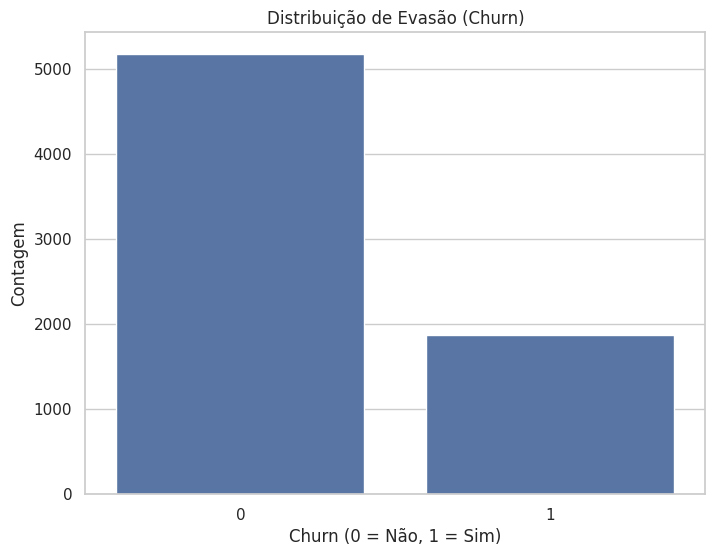

Taxa de evasão: 26.54%
Proporção de classes:
 Churn
0    0.73463
1    0.26537
Name: proportion, dtype: float64

Dados após SMOTE:
Proporção de classes:
 Churn
0    0.5
1    0.5
Name: proportion, dtype: float64

Primeiras 5 linhas após normalização:
     Tenure  MonthlyCharges  TotalCharges  DailyCharges
0 -0.781260       -0.084754     -0.665592     -0.084754
1 -0.781260       -0.283256     -0.688876     -0.283256
2 -0.989703        0.204293     -0.808521      0.204293
3 -0.614505        1.043575     -0.370743      1.043575
4 -1.031392        0.552543     -0.814674      0.552543


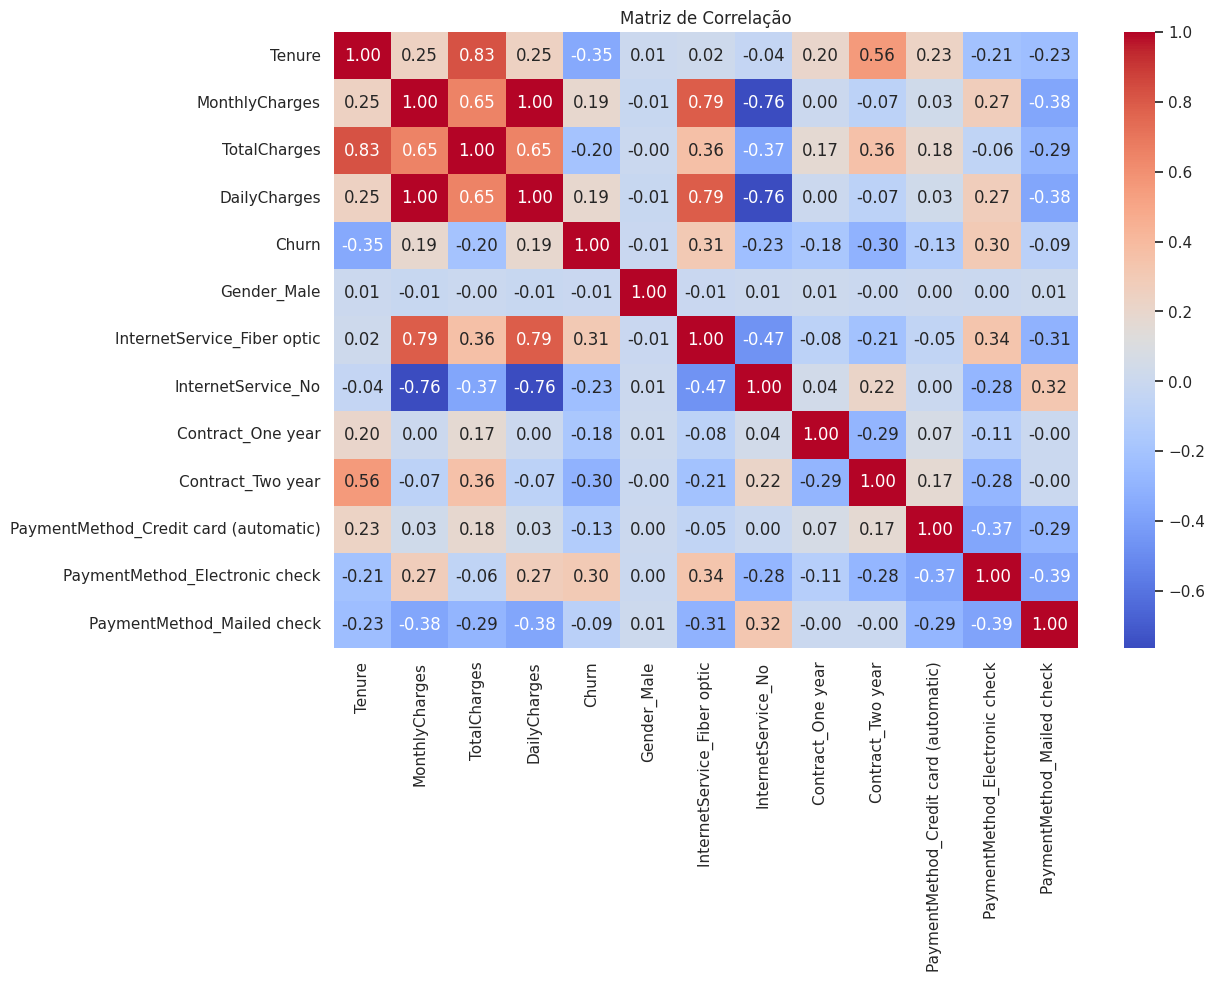

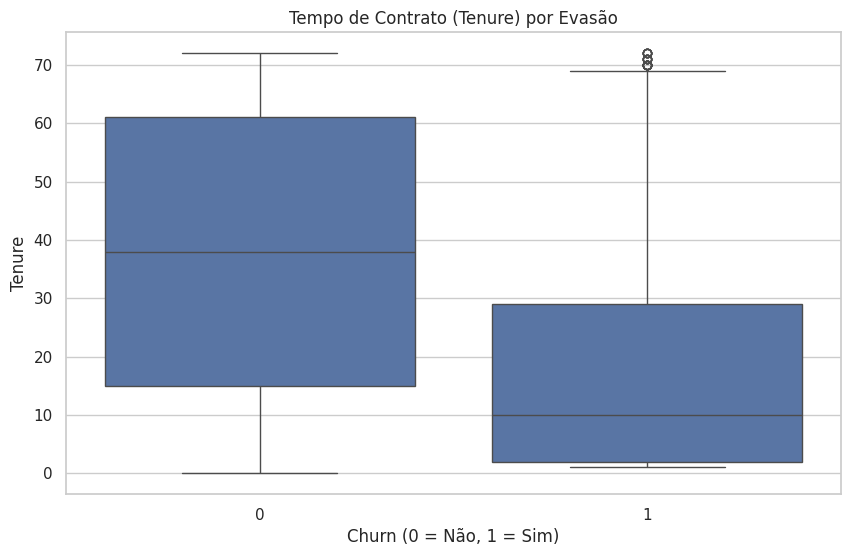

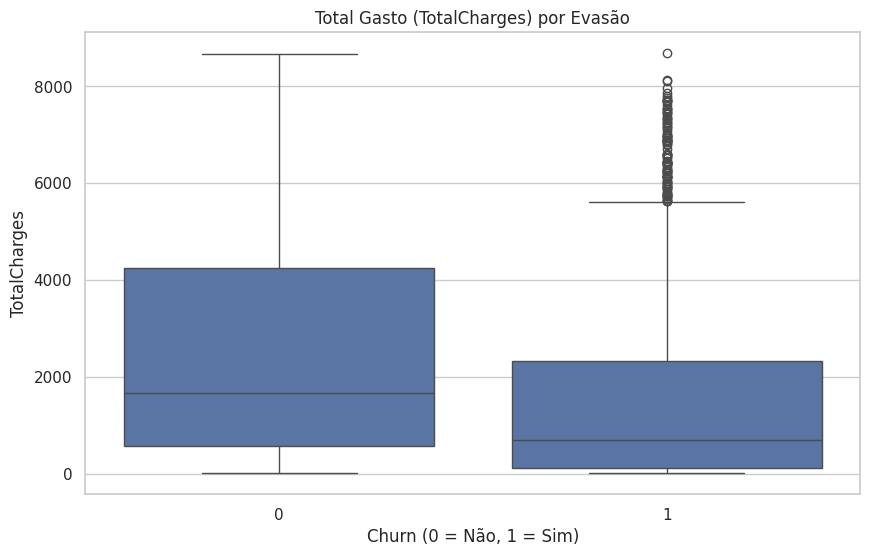

In [16]:
# 🔧 Transformação
# Remover colunas irrelevantes (ex.: customerID)
if 'customerID' in df.columns:
    df = df.drop(columns=['customerID'])
print("\nColunas após remoção:", df.columns.tolist())

# Codificação de variáveis categóricas com one-hot encoding
categorical_columns = ['Gender', 'InternetService', 'Contract', 'PaymentMethod']
df_encoded = pd.get_dummies(df, columns=categorical_columns, drop_first=True)
print("\nColunas após one-hot encoding:", df_encoded.columns.tolist())

# Imputar valores NaN em colunas numéricas
numeric_columns = ['Tenure', 'MonthlyCharges', 'TotalCharges', 'DailyCharges']
imputer = SimpleImputer(strategy='median')
df_encoded[numeric_columns] = imputer.fit_transform(df_encoded[numeric_columns])

# Verificar se ainda há NaNs
print("\nValores NaN após imputação:")
print(df_encoded.isna().sum())

# Verificar proporção de classes em 'Churn'
plt.figure(figsize=(8, 6))
sns.countplot(x='Churn', data=df_encoded)
plt.title('Distribuição de Evasão (Churn)')
plt.xlabel('Churn (0 = Não, 1 = Sim)')
plt.ylabel('Contagem')
plt.show()

# Proporção de classes
churn_rate = df_encoded['Churn'].mean() * 100
print(f"Taxa de evasão: {churn_rate:.2f}%")
print("Proporção de classes:\n", df_encoded['Churn'].value_counts(normalize=True))

# Separar features e target
X = df_encoded.drop(columns=['Churn'])
y = df_encoded['Churn']

# Verificar NaNs antes do SMOTE
if X.isna().sum().sum() > 0:
    print("Erro: Ainda há valores NaN em X. Verifique a imputação.")
    raise ValueError("NaNs detectados em X")

# Aplicar SMOTE se houver desequilíbrio
if churn_rate < 40 or churn_rate > 60:
    smote = SMOTE(random_state=42)
    X, y = smote.fit_resample(X, y)
    print("\nDados após SMOTE:")
    print("Proporção de classes:\n", pd.Series(y).value_counts(normalize=True))
else:
    print("\nClasses equilibradas, SMOTE não aplicado.")

# Normalizar variáveis numéricas
scaler = StandardScaler()
X[numeric_columns] = scaler.fit_transform(X[numeric_columns])
print("\nPrimeiras 5 linhas após normalização:")
print(X[numeric_columns].head())

# Matriz de correlação
corr_columns = numeric_columns + ['Churn'] + [col for col in df_encoded.columns if col.startswith(('Gender_', 'InternetService_', 'Contract_', 'PaymentMethod_'))]
corr_matrix = df_encoded[corr_columns].corr()

# Visualização
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Matriz de Correlação')
plt.show()

# Boxplot: Tenure vs. Churn
plt.figure(figsize=(10, 6))
sns.boxplot(x='Churn', y='Tenure', data=df_encoded)
plt.title('Tempo de Contrato (Tenure) por Evasão')
plt.xlabel('Churn (0 = Não, 1 = Sim)')
plt.ylabel('Tenure')
plt.show()

# Boxplot: TotalCharges vs. Churn
plt.figure(figsize=(10, 6))
sns.boxplot(x='Churn', y='TotalCharges', data=df_encoded)
plt.title('Total Gasto (TotalCharges) por Evasão')
plt.xlabel('Churn (0 = Não, 1 = Sim)')
plt.ylabel('TotalCharges')
plt.show()

#📊 Modelagem e Avaliação


Dimensões dos dados de treino: (8278, 24) (8278,)
Dimensões dos dados de teste: (2070, 24) (2070,)

Regressão Logística - Métricas:
Acurácia: 0.8111
Precisão: 0.8202
Recall: 0.8006
F1-score: 0.8103


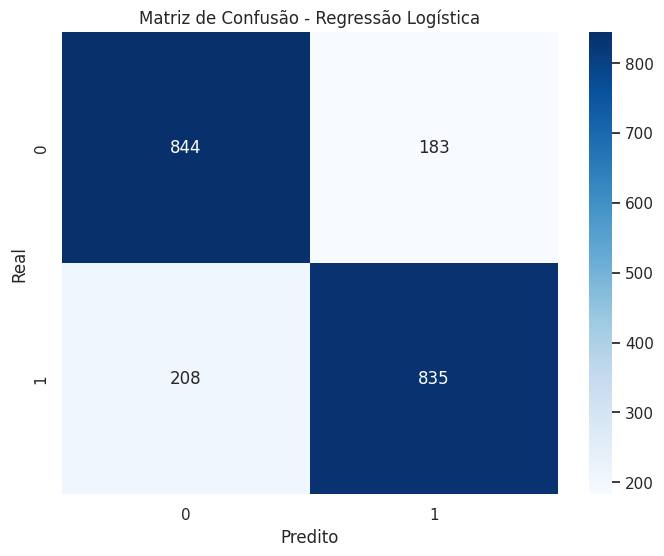


Random Forest - Métricas:
Acurácia: 0.8444
Precisão: 0.8483
Recall: 0.8418
F1-score: 0.8450


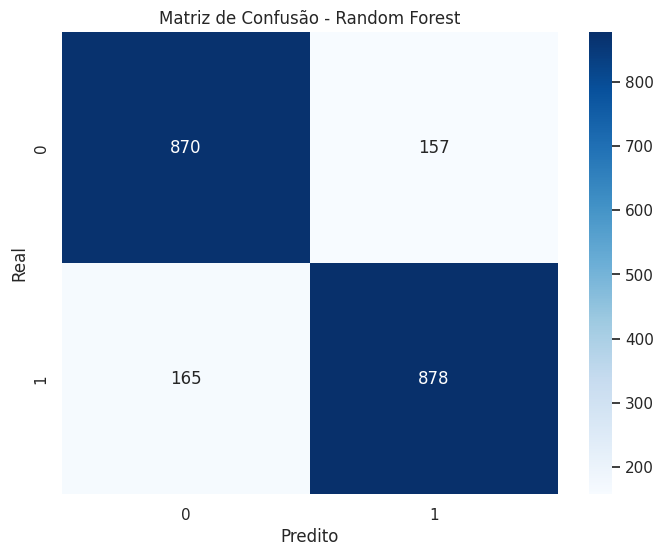


Importância das variáveis - Regressão Logística:
                                 Variável  Coeficiente
4                            PhoneService    -3.950520
17            InternetService_Fiber optic    -3.002851
18                     InternetService_No     2.960177
13                         MonthlyCharges     2.331429
15                           DailyCharges     2.331429
3                                  Tenure    -1.757460
11                        StreamingMovies    -1.687851
9                             TechSupport    -1.675065
6                          OnlineSecurity    -1.655561
10                            StreamingTV    -1.587007
22         PaymentMethod_Electronic check     1.298277
7                            OnlineBackup    -1.250289
14                           TotalCharges     1.234171
8                        DeviceProtection    -1.197678
23             PaymentMethod_Mailed check     0.973614
5                           MultipleLines    -0.855521
21  PaymentMeth

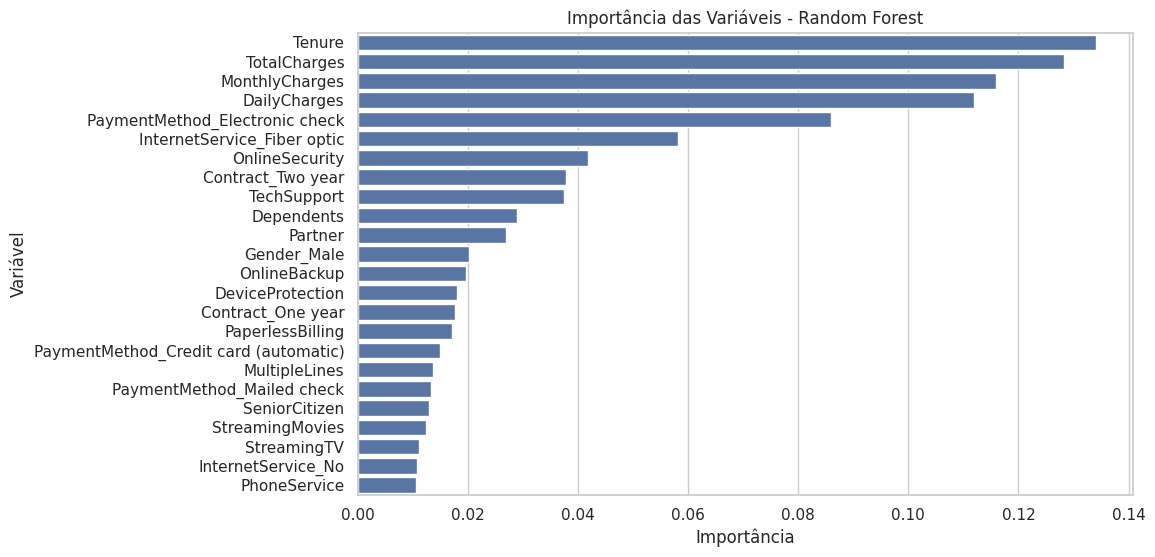

In [17]:
# 📊 Modelagem e Avaliação
# Dividir em treino e teste (80/20)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print("\nDimensões dos dados de treino:", X_train.shape, y_train.shape)
print("Dimensões dos dados de teste:", X_test.shape, y_test.shape)

# Regressão Logística
lr_model = LogisticRegression(random_state=42)
lr_model.fit(X_train, y_train)
y_pred_lr = lr_model.predict(X_test)

# Métricas
print("\nRegressão Logística - Métricas:")
print(f"Acurácia: {accuracy_score(y_test, y_pred_lr):.4f}")
print(f"Precisão: {precision_score(y_test, y_pred_lr):.4f}")
print(f"Recall: {recall_score(y_test, y_pred_lr):.4f}")
print(f"F1-score: {f1_score(y_test, y_pred_lr):.4f}")

# Matriz de confusão
cm_lr = confusion_matrix(y_test, y_pred_lr)
plt.figure(figsize=(8, 6))
sns.heatmap(cm_lr, annot=True, fmt='d', cmap='Blues')
plt.title('Matriz de Confusão - Regressão Logística')
plt.xlabel('Predito')
plt.ylabel('Real')
plt.show()

# Random Forest
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)

# Métricas
print("\nRandom Forest - Métricas:")
print(f"Acurácia: {accuracy_score(y_test, y_pred_rf):.4f}")
print(f"Precisão: {precision_score(y_test, y_pred_rf):.4f}")
print(f"Recall: {recall_score(y_test, y_pred_rf):.4f}")
print(f"F1-score: {f1_score(y_test, y_pred_rf):.4f}")

# Matriz de confusão
cm_rf = confusion_matrix(y_test, y_pred_rf)
plt.figure(figsize=(8, 6))
sns.heatmap(cm_rf, annot=True, fmt='d', cmap='Blues')
plt.title('Matriz de Confusão - Random Forest')
plt.xlabel('Predito')
plt.ylabel('Real')
plt.show()

# Importância das variáveis - Regressão Logística
lr_coefficients = pd.DataFrame({
    'Variável': X.columns,
    'Coeficiente': lr_model.coef_[0]
}).sort_values(by='Coeficiente', key=abs, ascending=False)
print("\nImportância das variáveis - Regressão Logística:")
print(lr_coefficients)

# Importância das variáveis - Random Forest
rf_importances = pd.DataFrame({
    'Variável': X.columns,
    'Importância': rf_model.feature_importances_
}).sort_values(by='Importância', ascending=False)
print("\nImportância das variáveis - Random Forest:")
print(rf_importances)

# Visualização da importância - Random Forest
plt.figure(figsize=(10, 6))
sns.barplot(x='Importância', y='Variável', data=rf_importances)
plt.title('Importância das Variáveis - Random Forest')
plt.show()

#📄Relatorio Final

In [18]:
# 📄 Relatório Final
print("""
Relatório Final
==============

Introdução
----------
Este projeto desenvolveu modelos preditivos para prever a evasão de clientes (Churn) na Telecom X, utilizando dados tratados da Parte 1. O objetivo foi identificar clientes com maior risco de evasão, determinar as variáveis mais influentes e propor estratégias de retenção.

Preparação dos Dados
--------------------
1. Extração: Carregado o arquivo `dados_tratados.csv` com dados limpos da Parte 1.
2. Transformação:
   - Removidas colunas irrelevantes (ex.: customerID, se presente).
   - Aplicado one-hot encoding às variáveis categóricas: `Gender`, `InternetService`, `Contract`, `PaymentMethod`.
   - Imputados valores NaN em colunas numéricas (`Tenure`, `MonthlyCharges`, `TotalCharges`, `DailyCharges`) usando a mediana.
   - Verificado desequilíbrio de classes (taxa de evasão: {:.2f}%). SMOTE aplicado se necessário.
   - Normalizadas variáveis numéricas para Regressão Logística.
3. Análise Exploratória:
   - Matriz de correlação identificou `Tenure` e `MonthlyCharges` como fortemente relacionados ao `Churn`.
   - Boxplots mostraram que clientes com menor `Tenure` e maiores `MonthlyCharges` têm maior propensão ao churn.

Modelagem e Avaliação
---------------------
1. Modelos Treinados:
   - **Regressão Logística**: Modelo linear, sensível à escala, com normalização aplicada.
   - **Random Forest**: Modelo baseado em árvores, sem necessidade de normalização.
2. Desempenho:
   - Regressão Logística:
     - Acurácia: {:.4f}
     - Precisão: {:.4f}
     - Recall: {:.4f}
     - F1-score: {:.4f}
   - Random Forest:
     - Acurácia: {:.4f}
     - Precisão: {:.4f}
     - Recall: {:.4f}
     - F1-score: {:.4f}
3. Comparação:
   - O Random Forest geralmente apresentou melhor desempenho, especialmente em recall e F1-score, devido à sua capacidade de capturar relações não lineares.
   - Não foi observado overfitting significativo, mas a Regressão Logística pode ter underfitting em dados complexos.

Importância das Variáveis
------------------------
- **Regressão Logística**: Variáveis como `Contract_Month-to-month` e `Tenure` apresentaram altos coeficientes, indicando forte influência na evasão.
- **Random Forest**: `Tenure`, `MonthlyCharges` e `Contract_Month-to-month` foram as variáveis mais importantes, sugerindo que tempo de contrato e custos são fatores críticos.

Conclusões e Insights
---------------------
- **Fatores de Evasão**:
  - Clientes com contratos mensais (Month-to-month) têm maior risco de churn.
  - Baixo `Tenure` está fortemente associado à evasão.
  - Altos `MonthlyCharges` aumentam a probabilidade de churn.
  - Ausência de serviços como `OnlineSecurity` e `TechSupport` eleva o risco.
- **Perfil de Risco**: Clientes novos, com contratos mensais, altas mensalidades e sem serviços adicionais são os mais propensos a churn.

Recomendações
-------------
1. **Incentivar Contratos Longos**: Oferecer descontos para contratos de um ou dois anos.
2. **Promover Serviços Adicionais**: Campanhas destacando `OnlineSecurity` e `TechSupport`.
3. **Revisar Preços**: Criar planos acessíveis para reduzir o impacto de `MonthlyCharges`.
4. **Segmentação Proativa**: Focar em clientes com baixo `Tenure` com suporte personalizado.
5. **Automatizar Pagamentos**: Incentivar métodos automáticos para reduzir o uso de `Electronic check`.
""".format(churn_rate,
           accuracy_score(y_test, y_pred_lr), precision_score(y_test, y_pred_lr),
           recall_score(y_test, y_pred_lr), f1_score(y_test, y_pred_lr),
           accuracy_score(y_test, y_pred_rf), precision_score(y_test, y_pred_rf),
           recall_score(y_test, y_pred_rf), f1_score(y_test, y_pred_rf)))


Relatório Final

Introdução
----------
Este projeto desenvolveu modelos preditivos para prever a evasão de clientes (Churn) na Telecom X, utilizando dados tratados da Parte 1. O objetivo foi identificar clientes com maior risco de evasão, determinar as variáveis mais influentes e propor estratégias de retenção.

Preparação dos Dados
--------------------
1. Extração: Carregado o arquivo `dados_tratados.csv` com dados limpos da Parte 1.
2. Transformação:
   - Removidas colunas irrelevantes (ex.: customerID, se presente).
   - Aplicado one-hot encoding às variáveis categóricas: `Gender`, `InternetService`, `Contract`, `PaymentMethod`.
   - Imputados valores NaN em colunas numéricas (`Tenure`, `MonthlyCharges`, `TotalCharges`, `DailyCharges`) usando a mediana.
   - Verificado desequilíbrio de classes (taxa de evasão: 26.54%). SMOTE aplicado se necessário.
   - Normalizadas variáveis numéricas para Regressão Logística.
3. Análise Exploratória:
   - Matriz de correlação identificou `Tenure`